In [1]:
import numpy as np
import pandas as pd
import mne
import os
import matplotlib.pyplot as pl
from   matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
# %matplotlib notebook
from jumeg.base.jumeg_base import jumeg_base as jb


In [7]:
p="/home/fboers/MEGBoers/data/exp/QUATERS/mne/210857/QUATERS01/191210_1325/1/"
f="210857_QUATERS01_191210_1325_1_c,rfDC,meeg,nr,bcc,int-raw.fif"
f="210857_QUATERS01_191210_1325_1_c,rfDC,meeg,nr,bcc,int,fibp0.10-45.0-raw.fif"
fraw=os.path.join(p,f)

In [47]:
raw,raw_fname = jb.get_raw_obj(fraw,raw=None)

Opening raw data file /home/fboers/MEGBoers/data/exp/QUATERS/mne/210857/QUATERS01/191210_1325/1/210857_QUATERS01_191210_1325_1_c,rfDC,meeg,nr,bcc,int,fibp0.10-45.0-raw.fif...
    Range : 0 ... 403362 =      0.000 ...   396.522 secs
Ready.
Current compensation grade : 0
Reading 0 ... 403362  =      0.000 ...   396.522 secs...


In [48]:
anna = raw.annotations
print(anna)

<Annotations  |  629 segments : ECG (509), EOG ver (64), EOG hor (56), orig_time : 2019-12-10 12:56:35>


In [49]:
t0=0.0
t1=132.0

raw_crop=raw.copy().crop(tmin=t0,tmax=t1)

In [50]:
anna_cr = raw_crop.annotations
print(anna_cr)

<Annotations  |  210 segments : ECG (169), EOG ver (19), EOG hor (22), orig_time : 2019-12-10 12:56:35>


In [51]:
print(anna_cr[0])

OrderedDict([('onset', 0.11698205769062042), ('duration', 0.0009830445051193237), ('description', 'ECG'), ('orig_time', 1575982595.0)])


In [67]:
evts= mne.events_from_annotations(raw_crop,event_id={ "EOG ver":998},use_rounding=True,chunk_duration=None)
onsets=evts[0][:,0]  #,:,0]
print(onsets.shape)
print(" {} ".format(onsets/1024.17))


Used Annotations descriptions: ['EOG ver']
(19,)
 [  0.22164289  16.04909341  21.16152592  36.00574123  42.12777176
  47.23922786  51.26199752  65.95291797  71.54573948  71.77616997
  75.58217874  82.24513508  91.59319254 101.07111124 109.91436968
 116.028589   119.50750364 125.82286144 129.29591767] 


In [69]:
ep = mne.Epochs(raw_crop,evts[0],event_id=998,tmin=-0.4,tmax=0.4)
print(ep) 

19 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Epochs  |   19 events (good & bad), -0.400098 - 0.400098 sec, baseline [None, 0], ~3.7 MB, data not loaded,
 '998': 19>


Loading data for 19 events and 815 original time points ...
1 bad epochs dropped
Loading data for 18 events and 815 original time points ...
Loading data for 18 events and 815 original time points ...


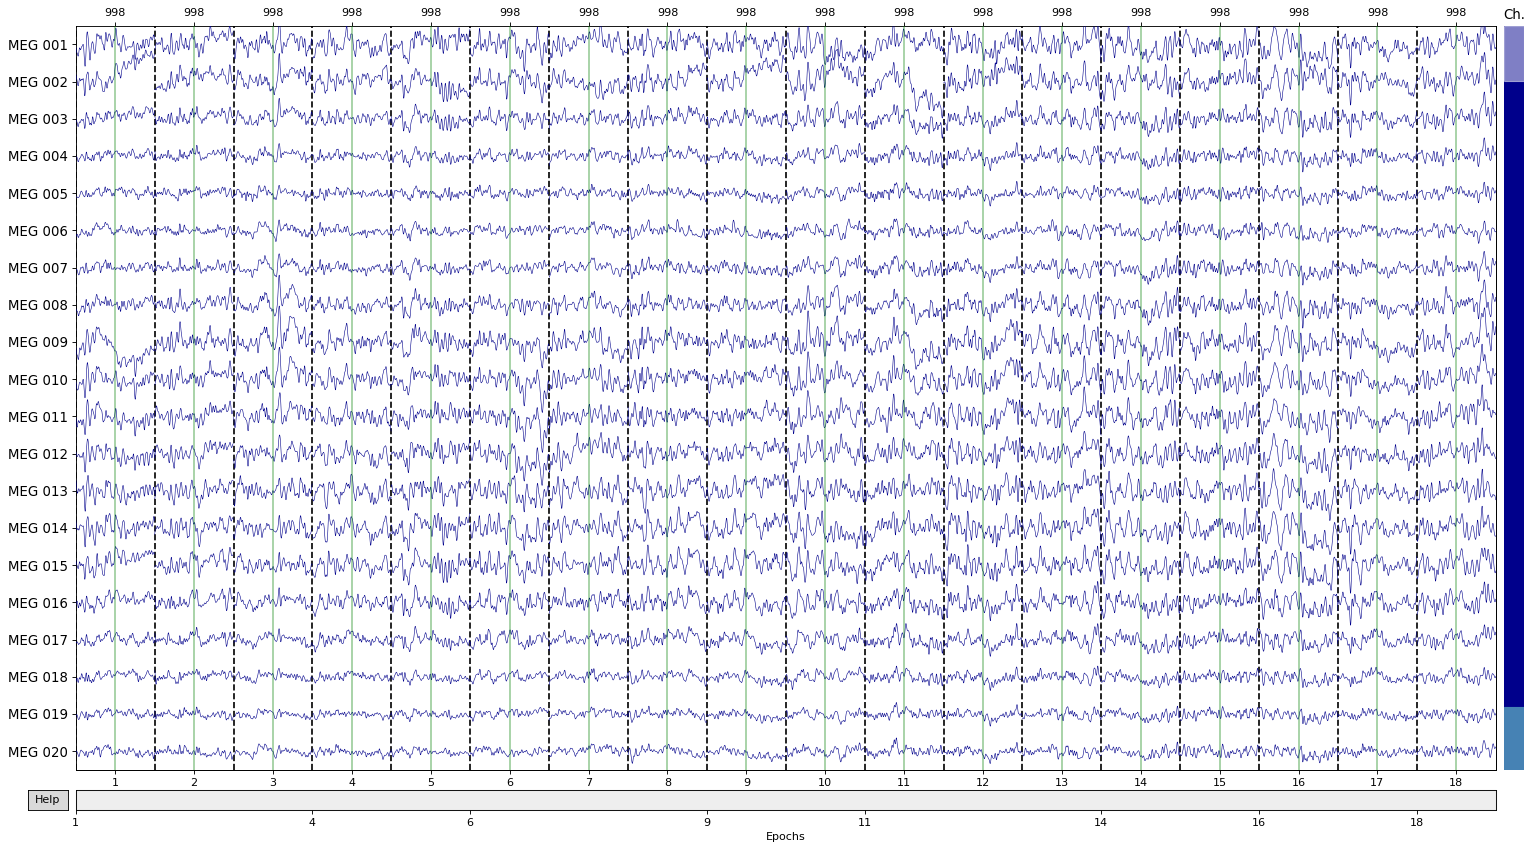

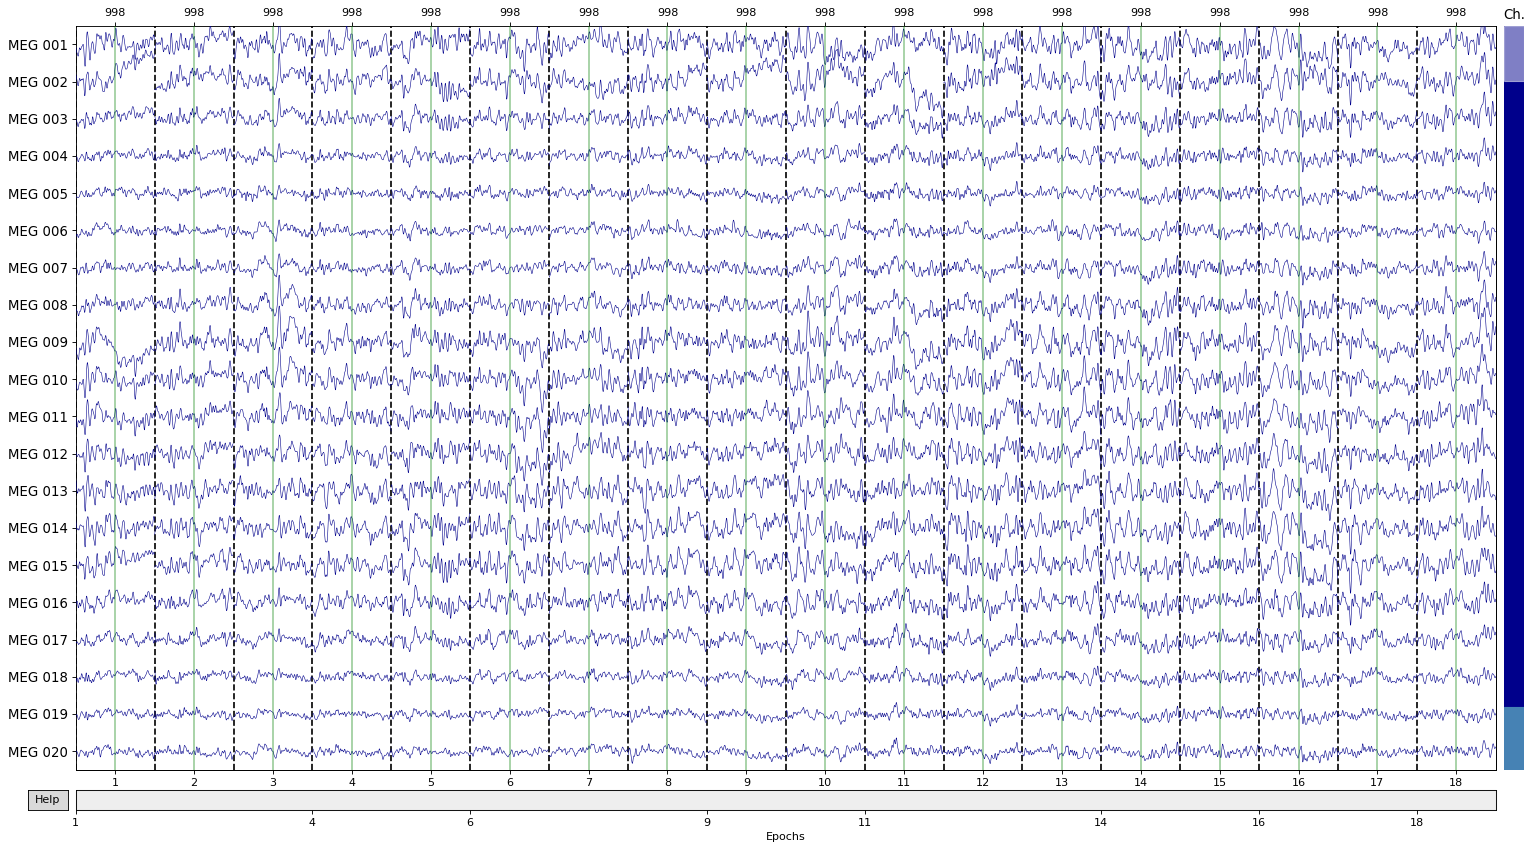

In [78]:
ep.plot(block=True)

In [70]:
avg=ep.average()
print(avg)

<Evoked  |  '998' (average, N=18), [-0.4001, 0.4001] sec, 271 ch, ~5.4 MB>


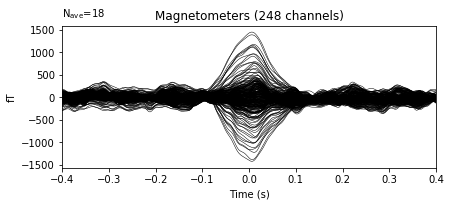

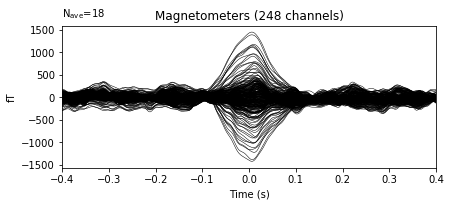

In [71]:
avg.plot()

In [73]:
t0=200.0
t1=300.0

raw_crop1=raw.copy().crop(tmin=t0,tmax=t1)

In [74]:
anna_cr1 = raw_crop1.annotations
print(anna_cr1)

<Annotations  |  160 segments : ECG (128), EOG hor (18), EOG ver (14), orig_time : 2019-12-10 12:56:35>


In [75]:
evts1= mne.events_from_annotations(raw_crop1,event_id={ "EOG ver":998},use_rounding=True,chunk_duration=None)
onsets1=evts1[0][:,0]  #,:,0]
print(onsets1.shape)
print(" {} ".format(onsets1/1024.17))

Used Annotations descriptions: ['EOG ver']
(14,)
 [210.65155199 216.40938516 220.6235293  230.8249607  234.86725837
 244.37056348 246.42490993 255.73098216 262.72493824 275.2531318
 276.01374772 280.91137214 288.1074431  293.62117617] 


In [76]:
ep1 = mne.Epochs(raw_crop1,evts1[0],event_id=998,tmin=-0.4,tmax=0.4)
print(ep1)    

14 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Epochs  |   14 events (good & bad), -0.400098 - 0.400098 sec, baseline [None, 0], ~3.7 MB, data not loaded,
 '998': 14>


Loading data for 14 events and 815 original time points ...
0 bad epochs dropped
Loading data for 14 events and 815 original time points ...
Loading data for 14 events and 815 original time points ...


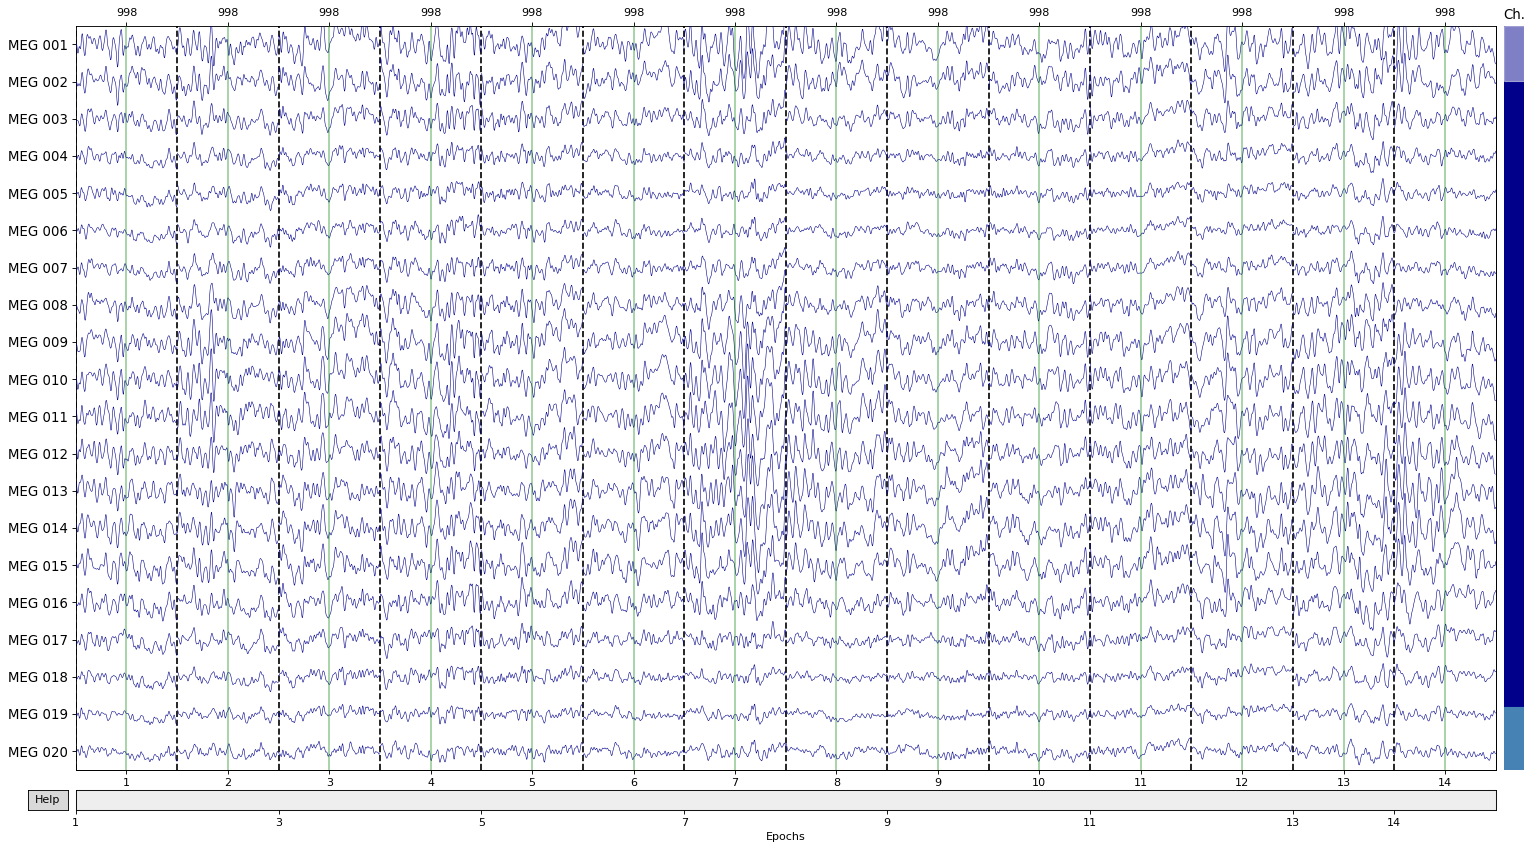

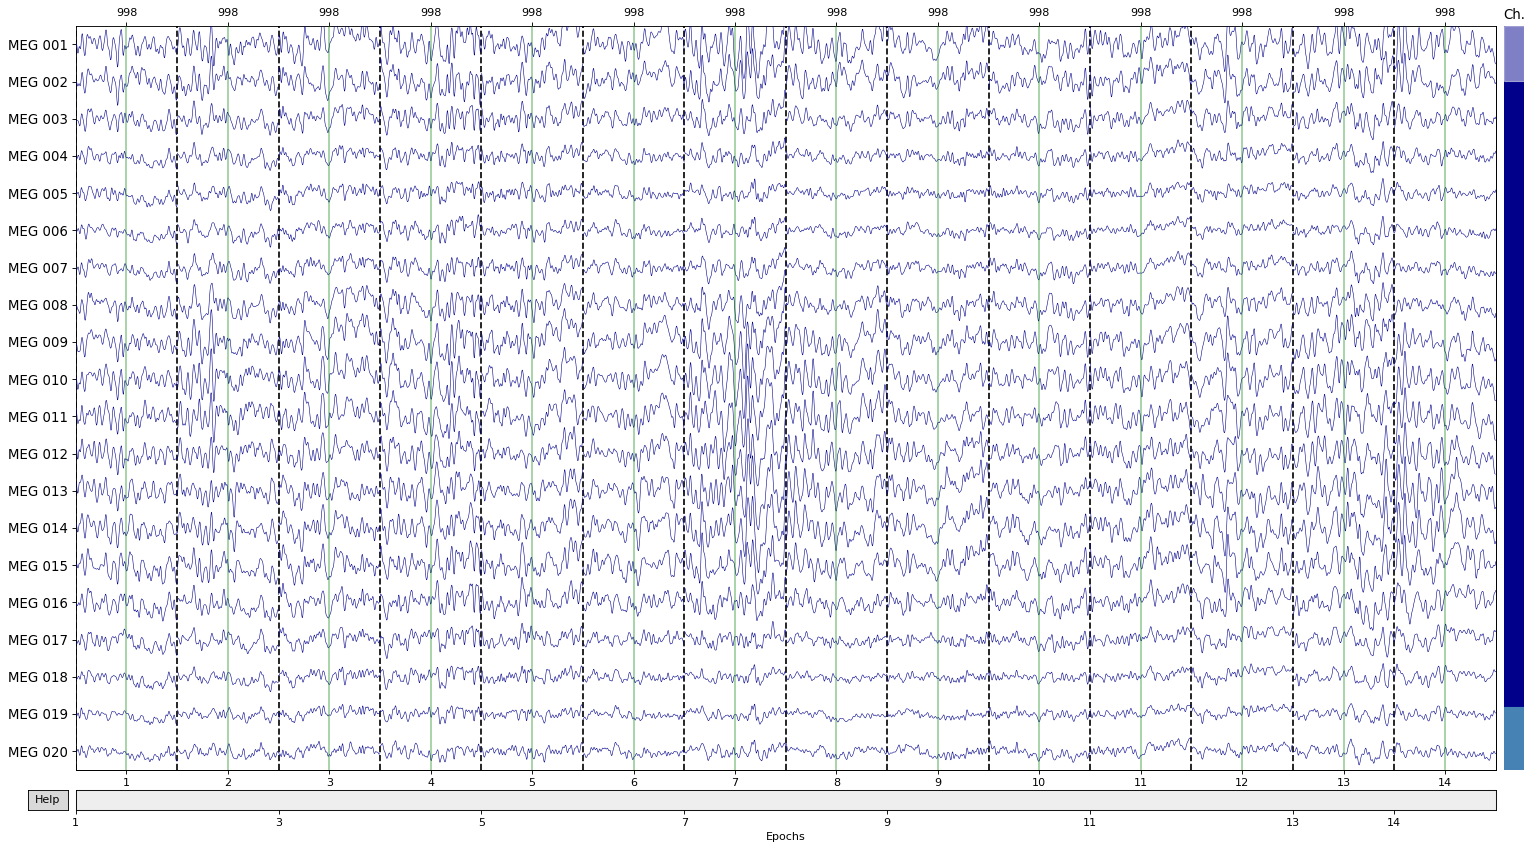

In [77]:
ep1.plot(block=True)

In [80]:
raw_crop1.times[-1]

100.0

In [81]:
avg1=ep1.average()


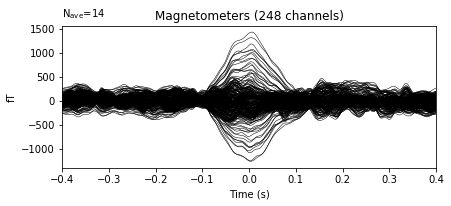

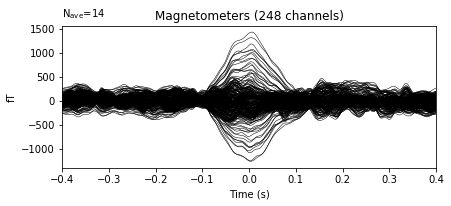

In [82]:
avg1.plot()

In [83]:
print(anna_cr1[0])


OrderedDict([('onset', 200.73629760742188), ('duration', 0.0009918212890625), ('description', 'ECG'), ('orig_time', 1575982595.0)])
